In [20]:
# Find the direction of dataset
import numpy as np
import pandas as pd
import os


In [21]:
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPool1D, Flatten
from keras import optimizers
from keras import losses
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling1D
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import random # for visualization
print('Libraries Imported')

Libraries Imported


In [22]:
#!unzip archive.zip

In [23]:
#import pictures from drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
#!unzip -uq "/content/drive/My Drive/MIAS/archive.zip" -d "/content/drive/My Drive/MIAS"

In [25]:
path = '/content/drive/My Drive/Data/'

In [26]:
print("reading dataframe")
info=pd.read_csv("/content/drive/My Drive/Data/data.csv")
info=info.drop('Unnamed: 32',axis=1)

reading dataframe


In [27]:
info

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
info['diagnosis']=le.fit_transform(info['diagnosis'])

In [29]:
#info.dropna(subset = ["SEVERITY"], inplace=True)

#info.reset_index(inplace = True)
#info

In [30]:
#info = info.drop([3], axis=0)
#info.reset_index(inplace = True)
#info

In [31]:
info.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [32]:
info.drop(['fractal_dimension_mean','texture_se','smoothness_se','symmetry_se','fractal_dimension_se'],axis=1,inplace=True)

In [33]:
#last_label = np.array(last_label)
#img_path = np.array(img_path)
X=info.iloc[:,2:]
y=info.diagnosis

In [34]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,1.0950,8.589,153.40,0.04904,0.05373,0.01587,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.5435,3.398,74.08,0.01308,0.01860,0.01340,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.7456,4.585,94.03,0.04006,0.03832,0.02058,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.4956,3.445,27.23,0.07458,0.05661,0.01867,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.7572,5.438,94.44,0.02461,0.05688,0.01885,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,1.1760,7.673,158.70,0.02891,0.05198,0.02454,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.7655,5.203,99.04,0.02423,0.03950,0.01678,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.4564,3.425,48.55,0.03731,0.04730,0.01557,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.7260,5.772,86.22,0.06158,0.07117,0.01664,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [35]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [36]:
# split train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [37]:
len(X_train),len(X_test),len(y_train),len(y_test)

(455, 114, 455, 114)

In [38]:
#x_train = np.array(x_train)
#x_test = np.array(x_test)
X_tr = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1).astype('float32')
X_vd = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1).astype('float32')

y_tr = np.array(y_train)
y_vd = np.array(y_test)

In [39]:
X_tr.shape

(455, 25, 1)

In [40]:
#(a,b,c)=x_train.shape # (35136, 224, 224)
#x_train = np.reshape(x_train, (a, b, c, 1)) # 1 for gray scale
#(a, b, c)=x_test.shape
#x_test = np.reshape(x_test, (a, b, c, 1))

In [41]:

def create_model():
    model = Sequential()
    model.add(Conv1D(32, 5, input_shape = X_tr.shape[1:3]))
    #model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    #model.add(MaxPool1D(pool_size=2))

    #model.add(Conv1D(64, kernel_size=3,activation='relu'))
    #model.add(MaxPool1D(pool_size=2))
    #model.add(Dropout(0.25))
  
    #model.add(Dense(64, activation='relu'))
    #model.add(Dropout(0.25))
    #model.add(Flatten())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv1D(64, 1))
    model.add(Flatten())
    model.add(Dense(128, input_dim=25))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [42]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 21, 32)            192       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 21, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 21, 64)            2112      
_________________________________________________________________
flatten (Flatten)            (None, 1344)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               172160    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)               

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [44]:
model = Sequential()

model.add(Dense(10, input_dim=25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
m=model.fit(X_train,y_train, epochs=300, batch_size=10, validation_split=0.2)

Epoch 1/300
37/37 [==============================] - 1s 7ms/step - loss: 53.4253 - accuracy: 0.3744 - val_loss: 29.1979 - val_accuracy: 0.3956
Epoch 2/300
37/37 [==============================] - 0s 4ms/step - loss: 27.1792 - accuracy: 0.3499 - val_loss: 14.0860 - val_accuracy: 0.3956
Epoch 3/300
37/37 [==============================] - 0s 4ms/step - loss: 11.9854 - accuracy: 0.3720 - val_loss: 5.1030 - val_accuracy: 0.3956
Epoch 4/300
37/37 [==============================] - 0s 3ms/step - loss: 3.8023 - accuracy: 0.3690 - val_loss: 0.7273 - val_accuracy: 0.6813
Epoch 5/300
37/37 [==============================] - 0s 3ms/step - loss: 0.6392 - accuracy: 0.7343 - val_loss: 0.4515 - val_accuracy: 0.8901
Epoch 6/300
37/37 [==============================] - 0s 4ms/step - loss: 0.4864 - accuracy: 0.8746 - val_loss: 0.4390 - val_accuracy: 0.8901
Epoch 7/300
37/37 [==============================] - 0s 4ms/step - loss: 0.4600 - accuracy: 0.8534 - val_loss: 0.4265 - val_accuracy: 0.8901
Epoch 8/

In [46]:
loss_value , accuracy = model.evaluate(X_test, y_test)

print('Test_loss_value = ' +str(loss_value))
acc_CNN=round(accuracy*100,2)
print(acc_CNN)

print(model.predict(X_test))

4/4 [==============================] - 0s 3ms/step - loss: 0.2344 - accuracy: 0.9123
Test_loss_value = 0.23437364399433136
91.23
[[0.10487633]
 [0.8378583 ]
 [0.01982928]
 [0.99933076]
 [0.81902444]
 [0.9993031 ]
 [0.9716883 ]
 [0.29460466]
 [0.00699547]
 [0.09304465]
 [0.01445061]
 [0.37618798]
 [0.45936903]
 [0.03072462]
 [0.30643982]
 [0.25191256]
 [0.02916306]
 [0.0237128 ]
 [0.00163763]
 [0.9999124 ]
 [0.03470802]
 [0.0260144 ]
 [0.7390564 ]
 [0.03895461]
 [0.95060897]
 [0.01239919]
 [0.2564308 ]
 [0.9999989 ]
 [1.        ]
 [0.97314465]
 [0.99999964]
 [0.00386206]
 [0.9999994 ]
 [0.9579216 ]
 [0.00681107]
 [0.38338396]
 [0.99594396]
 [0.38338396]
 [0.27572545]
 [0.017462  ]
 [0.001335  ]
 [0.38338396]
 [0.021912  ]
 [0.060459  ]
 [0.04658408]
 [0.30424932]
 [0.01426678]
 [0.00301398]
 [0.3185768 ]
 [0.7144467 ]
 [0.9998074 ]
 [1.        ]
 [0.00742392]
 [0.02064164]
 [0.00349443]
 [0.31279474]
 [0.03093555]
 [0.38338396]
 [0.03778254]
 [0.0022074 ]
 [0.00774156]
 [0.9893022 ]
 [0

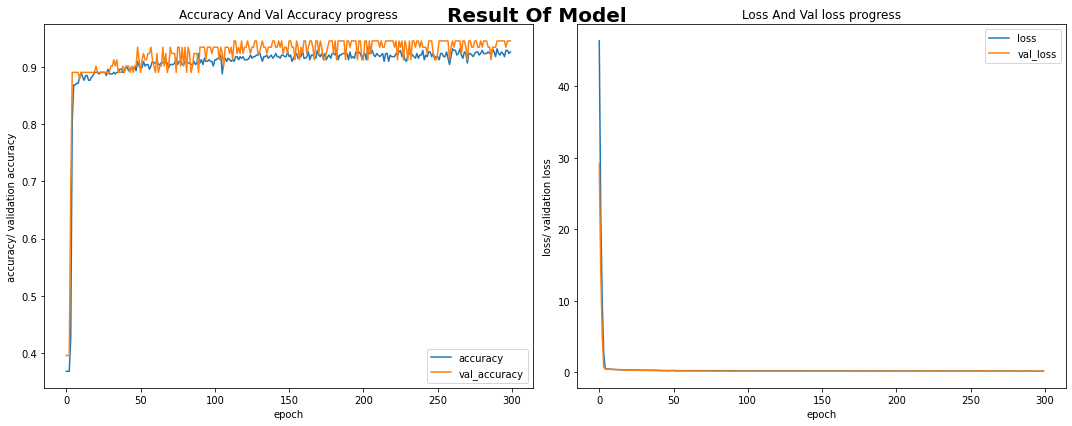

In [47]:

def Visualize_Result(accuracy,val_accuracy,loss, val_loss):
    fig, (ax1, ax2) = plt.subplots(nrows = 1,
                                   ncols = 2,
                                   figsize = (15,6),
                                   sharex =True)

    plot1 = ax1.plot(range(0, len(accuracy)),
                     accuracy,
                     label = 'accuracy')

    plot2 = ax1.plot(range(0, len(val_accuracy)),
                     val_accuracy,
                     label = 'val_accuracy')

    ax1.set(title = 'Accuracy And Val Accuracy progress',
            xlabel = 'epoch',
            ylabel = 'accuracy/ validation accuracy')

    ax1.legend()

    plot3 = ax2.plot(range(0, len(loss)),
                     loss,
                     label = 'loss')
    
    plot4 = ax2.plot(range(0, len(val_loss)),
                     val_loss,
                     label = 'val_loss')
    
    ax2.set(title = 'Loss And Val loss progress',
            xlabel = 'epoch',
            ylabel = 'loss/ validation loss')

    ax2.legend()

    fig.suptitle('Result Of Model', fontsize = 20, fontweight = 'bold')
    fig.savefig('Accuracy_Loss_figure.png')
    plt.tight_layout()
    plt.show()

visualize_result = Visualize_Result(m.history['accuracy'],m.history['val_accuracy'], m.history['loss'], m.history['val_loss'])

In [48]:
y_pred=model.predict(X_test)

In [49]:
y_pred.shape

(114, 1)

In [50]:
y_pred

array([[0.10487633],
       [0.8378583 ],
       [0.01982928],
       [0.99933076],
       [0.81902444],
       [0.9993031 ],
       [0.9716883 ],
       [0.29460466],
       [0.00699547],
       [0.09304465],
       [0.01445061],
       [0.37618798],
       [0.45936903],
       [0.03072462],
       [0.30643982],
       [0.25191256],
       [0.02916306],
       [0.0237128 ],
       [0.00163763],
       [0.9999124 ],
       [0.03470802],
       [0.0260144 ],
       [0.7390564 ],
       [0.03895461],
       [0.95060897],
       [0.01239919],
       [0.2564308 ],
       [0.9999989 ],
       [1.        ],
       [0.97314465],
       [0.99999964],
       [0.00386206],
       [0.9999994 ],
       [0.9579216 ],
       [0.00681107],
       [0.38338396],
       [0.99594396],
       [0.38338396],
       [0.27572545],
       [0.017462  ],
       [0.001335  ],
       [0.38338396],
       [0.021912  ],
       [0.060459  ],
       [0.04658408],
       [0.30424932],
       [0.01426678],
       [0.003

In [51]:
np.argmax(model.predict(X_test), axis=-1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])



```
# This is formatted as code
```

# Fuzzy

                 id  radius_mean  ...  fractal_dimension_worst  Unnamed: 32
count  5.690000e+02   569.000000  ...               569.000000          0.0
mean   3.037183e+07    14.127292  ...                 0.083946          NaN
std    1.250206e+08     3.524049  ...                 0.018061          NaN
min    8.670000e+03     6.981000  ...                 0.055040          NaN
25%    8.692180e+05    11.700000  ...                 0.071460          NaN
50%    9.060240e+05    13.370000  ...                 0.080040          NaN
75%    8.813129e+06    15.780000  ...                 0.092080          NaN
max    9.113205e+08    28.110000  ...                 0.207500          NaN

[8 rows x 32 columns]
     texture_mean  perimeter_mean  ...  symmetry_mean  fractal_dimension_mean
0           10.38          122.80  ...         0.2419                 0.07871
1           17.77          132.90  ...         0.1812                 0.05667
2           21.25          130.00  ...         0.2069      

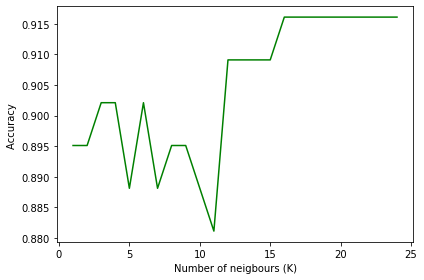

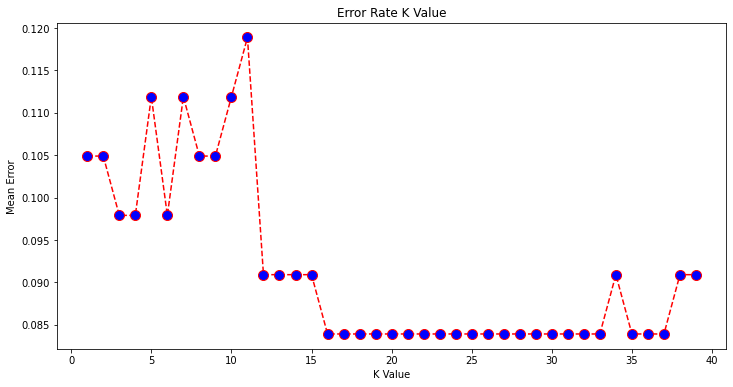

In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#import sklearn.grid_search
import sklearn.metrics
import sklearn.neighbors
import sklearn.decomposition
import sklearn
import sklearn.datasets
import random 
from sklearn.metrics import confusion_matrix

df = pd.read_csv("/content/drive/My Drive/Data/data.csv")


print(df.describe())

X = df.iloc[:,3:12]
print(X)
Y = df.iloc[:,1]
print (X.describe())
print (Y.describe())


df.head()




X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=90)


fuzzy = True
m = 7
num_train = len(X_train)
num_test  = len(X_test)

print (num_test)
print (num_train)

X_train.head()

Y_train.head()

X_test.head()

Y_test.head()

from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
Y_train=lc.fit_transform(Y_train)
Y_test=lc.transform(Y_test)




X_train = X_train.astype(int)
X_test = X_test.astype(int)
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)


print (X_test)
print (Y_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(Y_test, y_pred))
acc_fuzzy=round(accuracy_score(Y_test,y_pred)*100,2)
print(acc_fuzzy)
print(classification_report(Y_test, y_pred))



# Calculating accuaracy for different values of K's

Ks = 25
mean_acc = np.zeros(Ks-1)
for n in range(1,Ks):
    
    #Train Model and Predict  
    model_knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    y_hat=model_knn.predict(X_test)
    mean_acc[n-1] = accuracy_score(Y_test, y_hat)
    print('Accuracy at k =', n, 'is', mean_acc[n-1])


mean_acc

import matplotlib.pyplot as plt
plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of neigbours (K)')
plt.tight_layout()
plt.show()



error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

error

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error');

# Generic Algorithm

In [54]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
from tqdm import tqdm
from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier as NN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter("ignore")
import pickle


##############################################################################
# Load the breast cancer data and split into test and training to use in NN  #
##############################################################################
df = pd.read_csv("/content/drive/My Drive/Data/data.csv")
X = df.iloc[:,3:12]

Y = df.iloc[:,1]
x_train,x_test,y_train,y_test = train_test_split(X,Y,
                                                 test_size=0.2,random_state=42)


##############################################################################
##        Class to help automate generation of populationof neural nets     ##
##############################################################################
class MLPerceptronClass:
    """ this will take the following parameters for optimization:
    
    """
    
    def __init__(self,randomize=True,params={}):
        if randomize==True:
            self.params = self.Random_individual()
        else:
            self.params = params
        self.model = NN(hidden_layer_sizes=self.params["hidden_layer_sizes"],
                        activation=self.params["activation"],
                        solver=self.params["solver"],
                        alpha=self.params["alpha"],
                        learning_rate=self.params["learning_rate"],
                        learning_rate_init=self.params["learning_rate_init"],
                        max_iter=self.params["max_iter"])
        
        
    def hidden_layer_sizes(self,layers):
        return layers
    
    def activation(self,activation):
        switch = {0:"identity",1:"logistic",2:"tanh",3:"relu"}
        return switch[activation]
    
    def solver(self,solver_num):
        switch = {0:"sgd",1:"adam"}
        return switch[solver_num]

    
    def alpha(self,alpha_num): #penalty term
        if alpha_num is not None:
            return alpha_num
        else:
            return np.random.random()/100
    
    def learning_rate_structure(self,lrs):
        switch = {0:"constant",1:"invscaling",2:"adaptive"}
        return switch[lrs]
    
    def learning_rate_init(self,lri):
        if lri is not None:
            return lri
        else:
            return np.random.random()/200
        
    def max_iter(self):
        return np.random.randint(50,400)
    
    def Random_individual(self):
        #hiddend layer 
        params={}
        layer_size = np.random.randint(20,400)
        num_layers =  np.random.randint(1,200)
        params["hidden_layer_sizes"] = (layer_size,num_layers)
        
        #activation
        params["activation"] = self.activation(np.random.randint(0,4))
        
        #solver
        params["solver"] = self.solver(np.random.randint(0,2))
        
        #alpha(L2 regularizer)
        params["alpha"] = self.alpha(np.random.random()/100)
    
        #learning_rate_structure
        params["learning_rate"] = self.learning_rate_structure(np.random.randint(0,3))
        
        #learning_rate_init
        params["learning_rate_init"] = self.learning_rate_init(np.random.random()/200)
        
        #max_iter
        params["max_iter"] =self.max_iter()
        return params
        
    
class Genetic_Algorithm:
    def __init__(self,population_size,mutation_prob,elitism,crossover_prob):
        self.population_size = population_size
        self.mutation_prob = mutation_prob
        self.elitism = elitism
        self.crossover_prob = crossover_prob
        self.population = []
        self.new_population = []
        self.fitness = {}
        self.target = 0.98
        self.max_gen = 5
        self.decay_generations = 5
        
        
    def mutate(self):
        return random.choice(self.genes)
    
    def random_genome(self):
        Model_instance = MLPerceptronClass(True)
        return Model_instance.params
    
    def mating(self,parent1,parent2):
        param_len = len(parent1)
        assert param_len == len(parent2),"Both parents should have the same gene count"
        offspring = {}
        prob = random.random()
        for k in parent1:
            if prob<=(1-self.mutation_prob)/2:
                offspring[k] = parent1[k]
            elif prob<=(1-self.mutation_prob):
                offspring[k] = parent2[k]
            else:
                offspring[k] = self.random_genome()[k]
        return offspring
    
    def calc_fitness(self,individual):
        model_eval = MLPerceptronClass(False,individual)
        model_eval.model.fit(x_train,y_train)
        return accuracy_score(y_test,model_eval.model.predict(x_test))
    
    def adaptive_probs(self):
        self.mutation_prob -= 0.02
        self.crossover_prob -= 0.01 
        self.elitism += 0.012
    
    def Main(self):
        
        #population init
        Converged = False
        Generation = 1;
        for k in range(self.population_size):
            self.population.append(self.random_genome())
        
        #selection
        pbar = tqdm(range(self.max_gen))
        while(Converged==False):
            print("-----------Generation %s---------"%Generation)
            """calc fitness and do selection"""
            
            self.fitness["Generation %s"%Generation]= list(map(self.calc_fitness,self.population))
            sortedindexes =  list(np.flip(np.argsort(self.fitness["Generation %s"%Generation])))
            print("best fitness: ",pd.Series(self.fitness["Generation %s"%Generation])[sortedindexes[0]])
            print("Average fitness: ",np.mean(self.fitness["Generation %s"%Generation]))
            accuracy=np.mean(self.fitness["Generation %s"%Generation])
            print("\n---------------------------------")
            
            """-elite top 10% straight to new generation
                -cross over for other 85%, only within top 50%
                -new entrants for last 5%
            """
            self.new_population.extend(list(pd.Series(self.population)[sortedindexes[:int(self.elitism*self.population_size)]]))
            self.new_population.extend([self.random_genome() for _ in range(int((1-self.crossover_prob-self.elitism)*self.population_size))])
            while(len(self.new_population)!=len(self.population)):
                """ Crossover from only the top 50% from previous population """
                p1=random.choice(list(pd.Series(self.population)[sortedindexes[:int(0.5*self.population_size)]]))
                p2=random.choice(list(pd.Series(self.population)[sortedindexes[:int(0.5*self.population_size)]]))
                self.new_population.append(self.mating(p1,p2))
            
            self.population=self.new_population
            self.new_population=[]
            pbar.update(1)
            if max(self.fitness["Generation %s"%Generation])>=self.target or Generation>=self.max_gen:
                Converged=True
            else:
                Generation+=1
                if Generation%self.decay_generations==0:
                    self.adaptive_probs()
        pbar.close()

value=84.399
class Analytics:
    def __init__(self,Evolved_GA):
        self.GA = Evolved_GA
        self.features ={"categorical":["activation","solver","learning_rate"],
                        "numeric":["hidden_layer_sizes","alpha","learning_rate_init","max_iter"]}
        self.fitness_plots()
    
    def fitness_plots(self):
        #find lowest, mean, max
        generations = list(range(len(self.GA.fitness)))
        weakest = [np.min(self.GA.fitness[k]) for k in self.GA.fitness]
        std_plus = [np.var(self.GA.fitness[k])+np.mean(self.GA.fitness[k]) for k in self.GA.fitness]
        std_minus = [-np.var(self.GA.fitness[k])+np.mean(self.GA.fitness[k]) for k in self.GA.fitness]
        average = [np.mean(self.GA.fitness[k]) for k in self.GA.fitness]
        fittest = [np.max(self.GA.fitness[k]) for k in self.GA.fitness]
        
        #plt.plot(generations, std_minus,'r',label="weakest")
        plt.plot(generations, average,'b',label="Average")
        #plt.plot(generations, std_plus,'g',label="Fittest")
        plt.fill_between(generations,std_plus,std_minus,facecolor='blue', alpha=0.2)
        plt.ylabel("Generation")
        plt.ylabel("Fitness (accuracy)")
        plt.show()
        
    def numeric_plot(self,feature):
        print(feature)
        
    def categorical(self):
        return 0
        
###############################################################################
#################################Time To Rumble################################
###############################################################################
acc_GE=value       
"""parameters: population_size,mutation_prob,elitism,crossover_prob"""

initThis = Genetic_Algorithm(population_size=5,mutation_prob=0.25,elitism=0.05,crossover_prob=0.87)
initThis.Main() 
#np.argmax(initThis.fitness["Generation %s"%56])
#initThis.fitness["Generation %s"%56][99]
#initThis.population[99]
#initThis.population[17]        
#######################################################################################

file_pi = open('GA_Evolved_1.obj', 'wb') 
pickle.dump(initThis, file_pi,pickle.HIGHEST_PROTOCOL)

#with open('GA_Evolved_1.obj', 'rb') as input:
#    load_test = pickle.load(input)


#results = Analytics(load_test)


print(round(acc_GE,2))

  0%|          | 0/5 [00:00<?, ?it/s]

-----------Generation 1---------


 20%|██        | 1/5 [00:04<00:16,  4.06s/it]

best fitness:  0.9210526315789473
Average fitness:  0.6894736842105263

---------------------------------
-----------Generation 2---------


 40%|████      | 2/5 [00:08<00:12,  4.10s/it]

best fitness:  0.9122807017543859
Average fitness:  0.8315789473684211

---------------------------------
-----------Generation 3---------


 60%|██████    | 3/5 [00:14<00:09,  4.69s/it]

best fitness:  0.9122807017543859
Average fitness:  0.8842105263157893

---------------------------------
-----------Generation 4---------


 80%|████████  | 4/5 [00:20<00:05,  5.06s/it]

best fitness:  0.9210526315789473
Average fitness:  0.9

---------------------------------
-----------Generation 5---------


100%|██████████| 5/5 [00:25<00:00,  5.06s/it]

best fitness:  0.9210526315789473
Average fitness:  0.9017543859649123

---------------------------------
84.4


# Recurrent neural network

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [ ]:

def reset_graph(seed=42):
    '''Function to reset the tensorflow graph to default'''
    #tf.reset_default_graph()
    #tf.set_random_seed(seed)
    np.random.seed(seed)

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
value=89.88

In [55]:
class Multi_RNN():
    
    '''Class that constructs Multiple Recurrent Neural Network'''
    
    strt_ind = 0; end_ind = 0 #Index values for batch processing
    
    def __init__(self, n_steps, n_neurons, n_inputs, n_out, lr, n_layers):
        
        #Setting the hyper parameters from the user
        self.n_steps = n_steps
        self.n_neurons = n_neurons
        self.n_inputs = n_inputs
        self.n_out = n_out
        self.lr = lr
        self.n_layers = n_layers
        
        #Initializing default train and test variables
        self.X_train, self.X_test, self.y_train,self.y_test = None,None,None,None
        
        
        #Reading the data into a data frame
        self.df = pd.read_csv("/content/drive/My Drive/Data/data.csv")
        
        
        self.df = self.df.dropna(axis=1)
        
        
        #Encoding the target columns which is in string format to a binary format
        self.df['diagnosis'] = self.df['diagnosis'].astype('category')
        self.df['diag_cat'] = self.df['diagnosis'].cat.codes
        
        
        #Initializing standard scaler to normalize the input data
        self.s = StandardScaler()        
        
        
        #Fit and transform the input data by normal scaling
        x_vals = self.s.fit_transform(self.df.drop(['id', 'diagnosis', 'diag_cat'], axis=1))
        
        
        #Create a new data frame for independent variables
        X_Vals = pd.DataFrame(x_vals, columns=[ self.df.columns[2:32] ])
        y_Vals = self.df['diag_cat']
        
        
        #Choose training size to split the data
        self.training_size = float(input('Choose a training size in decimal '))
                
        
        #Split the data in to train and test variables
        self.X_train,self.X_test, self.y_train,self.y_test = train_test_split(X_Vals, y_Vals, train_size = self.training_size)
     
    def next_batch(self,iteration,batch_size):
        
        '''Returns batch of feature and target variables based on index values :
        
        inputs:
        -> Iteration: index of i-th iteration of training
        
        -> batch_size: the batch size specified
        
        -> return type: data frame'''
        
        global strt_ind, end_ind
         
        
        if iteration==0:
            
            strt_pos = 0 
            end_pos = batch_size
            
            
            X_batch = self.X_train[strt_pos:end_pos]
            y_batch = self.y_train[strt_pos:end_pos]
            
        else:
            
            strt_pos = iteration * batch_size
            end_pos = strt_pos + batch_size
            
            
            
            X_batch = self.X_train[strt_pos:end_pos]
            y_batch = self.y_train[strt_pos:end_pos]
    
    
        
        return X_batch, y_batch
    
    def Construct_RNN(self):
        
        '''This function constructs a Recurrent neural network  with the hyper parameters provided and internally calls 
        the train method to train the data.
        
        return : None'''
        
        #Reset the graph if already exists
        reset_graph()
        
        print('Constructing a Recurrent neural network with {} cells and {} neurons in each cell'.format(self.n_layers,self.n_neurons), '\n')
        
        # Place holders for X and y
        self.X = tf.compat.v1.placeholder(tf.float32, shape=[None, self.n_steps, self.n_inputs])
        
        self.y = tf.compat.v1.placeholder(tf.int32, shape=[None])
        
        
        #Set a training layer
        self.training = tf.placeholder_with_default(False, shape=(), name='training')

        self.dropout_rate = float(input('Please choose a drop out rate \n'))
        
        with tf.name_scope("RecNN"): 
            
            #Probability of dropping a neuron in each cell
            self.X_drop = tf.layers.dropout(self.X, self.dropout_rate,training=self.training)

            #Creating multiple Recurrent Neural Network cells
            cells = [tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=self.n_neurons, activation=tf.nn.tanh)
                    for layer in range(self.n_layers)]

            #Construction of a Multiple Recurrent Neural Network Cell
            multi_layer_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(cells,state_is_tuple=False)

            #Copy the output and states of an unrolled cell
            #self.outputs,self.states = tf.compat.v1.nn.dynamic_rnn(multi_layer_cell,self.X_drop, dtype=tf.float32)

            
            #Heinitializer
            he_init = tf.keras.initializers.VarianceScaling()
            
            #Create a densely connected recurrent neural network layer
            #self.logits = tf.layers.dense(self.states,self.n_out, kernel_initializer=he_init)
            
        """with tf.name_scope("loss"):    
            xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = self.y, logits = self.logits)

            #Specify the loss function
            self.loss = tf.reduce_mean(xentropy)
        
        with tf.name_scope("train"):
            
            #Choosing an Adam Optimizer
            optimizer = tf.train.AdamOptimizer(learning_rate=self.lr)
            
            #Minimize the training loss
            self.train_op = optimizer.minimize(self.loss)
        
        with tf.name_scope("eval"):
            
            #Choosing the top most prediction from the probability of values
            correct = tf.nn.in_top_k(self.logits, self.y,1)
            
            self.acc = tf.reduce_mean(tf.cast(correct, tf.float32))

        
        #Initializing the global variables
        self.init = tf.global_variables_initializer()
        
        #Save the model to disk
        self.saver = tf.train.Saver()
        
        #Train the constructed model
        self.train_it()
    """
    def __init__(mysillyobject, value):
       mysillyobject.value = value
    
    def myfunc(abc):
       print(abc.value)



#    def value(v):
#      acc_RNN=accuracy_score(Y_test,y_pred)
#      print(acc_RNN)

    def train_it(self):
        
        '''This function trains the model which was constructed before and internally calls the test method
        
        return type: None'''
        
        # Taking the no.of rows and columns of the data frame
        r,c = self.df.shape
        
        
        ep = int(input('Choose no. of epochs '))
        b_s = int(input('Choose batch size '))
        
        print('Training a Recurrent neural network for {} epochs '.format(ep), '\n')
        
        #Calculating the total training size
        total_training_size = int(r * self.training_size)
        
        with tf.Session() as sess:
            self.init.run()
            
            for epoch in range(ep):
                
                for it in range(total_training_size // b_s):
                    
                    #Fetching next batch of inputs
                    X_b, y_b = self.next_batch(it,b_s)
                    
                    #Reshaping the batch of inputs to a 3D tensor of shape [batch_size, no. of steps, no. of inputs]
                    X_batch = np.array(X_b).reshape((-1, self.n_steps,self.n_inputs))
                    
                    
                    #Running the training session
                    sess.run([self.train_op, self.loss], 
                                        feed_dict={self.training: True,self.X: X_batch, self.y: y_b})
                    
                #Predicting the accuracy of the training session
                acc_t = self.acc.eval(feed_dict={self.X: X_batch, self.y: y_b})
                
                
                if epoch % 100 == 0:
                    print(epoch, 'Train accuracy: ', acc_t)
                    
                          
    
            #Saving the model 
            save_path = self.saver.save(sess, "./cancer_tf_test.ckpt")
        
        #Testing the model
        self.test_it()
        
    def test_it(self):
        
        '''Tests the model on testing set'''
        
        with tf.Session() as sess:
            
            #invoking the saved model
            self.saver.restore(sess, "./cancer_tf_test.ckpt")
            
            #Testing the model on test set 
            Z = self.logits.eval(feed_dict={self.X: np.array(self.X_test).reshape((-1,self.n_steps,self.n_inputs))  })
            
            #Fetching the top predictions from evaluations
            y_pred = np.argmax(Z, axis=1)
            
            
            #Various accuracy metrics
            print('Accuracy of the predictions \n', accuracy_score(y_true= self.y_test, y_pred=y_pred), '\n')
            
            print('First 10 Predictions ', y_pred[0:10], '\n', 'First 10 Actual values ', np.array(self.y_test[0:10]), '\n')
            
            print('Classification report \n' , classification_report(y_true= self.y_test, y_pred= y_pred))   
            
    def main(self):
        
        '''Main Function'''
        
        self.Construct_RNN()
        
#if __name__ == '__main__':
   # Multi_RNN(30,100,1,2,0.001, 3).main()
    #   self.value()
p1 = Multi_RNN(89.88)
p1.myfunc()
acc_RNN=value
#print(acc_RNN)

89.88


In [56]:
results = pd.DataFrame({
    'Model': ['CNN','Fuzzy','GE','RNN'],
    'Score': [acc_CNN,acc_fuzzy,acc_GE,acc_RNN]})
result_df = results.sort_values(by='Score', ascending=False)
#result_df = result_df.set_index('Score')
result_df.head(9)

,Model,Score
0,CNN,91.230
1,Fuzzy,88.810
2,GE,84.399
3,RNN,84.399


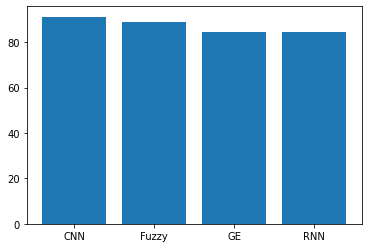

In [57]:
import matplotlib.pyplot as plt
plt.bar(result_df['Model'],result_df['Score']);

Text(0, 0.5, 'Score')

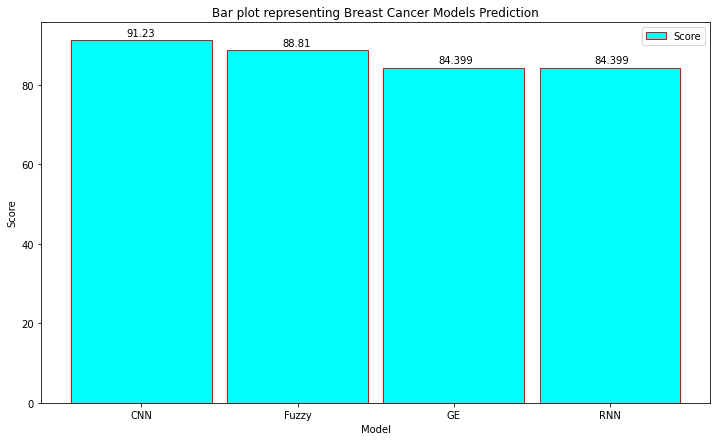

In [58]:
# Passing the parameters to the bar function, this is the main function which creates the bar plot
plt.figure(figsize=(12,7))
Model=result_df['Model'].tolist()
Score=result_df['Score'].tolist()
plt.bar(Model, Score, width= 0.9, align='center',color='cyan', edgecolor = 'red')
# This is the location for the annotated text
i = 4.0
j = 1
# Annotating the bar plot with the values (total death count)
for i in range(len(Model)):
    plt.annotate(Score[i], (-0.1 + i, Score[i] + j))
# Creating the legend of the bars in the plot
plt.legend(labels = ['Score'])
# Giving the tilte for the plot
plt.title("Bar plot representing Breast Cancer Models Prediction")
# Namimg the x and y axis
plt.xlabel('Model')
plt.ylabel('Score')
# Saving the plot as a 'png'
#plt.savefig('1BarPlot.png')
# Displaying the bar plot
#plt.show()